## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [16]:
df.drop('State', axis=1, inplace=True)

In [17]:
def to_numeric(data):
    return 1 if data == 'Yes' else 0


df['Churn'] = df['Churn'].astype(int)
df['International plan'] = df['International plan'].apply(to_numeric)
df['Voice mail plan'] = df['Voice mail plan'].apply(to_numeric)

In [18]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [19]:
X = df.drop('Churn', axis=1)
y = df['Churn']

<Axes: ylabel='Target'>

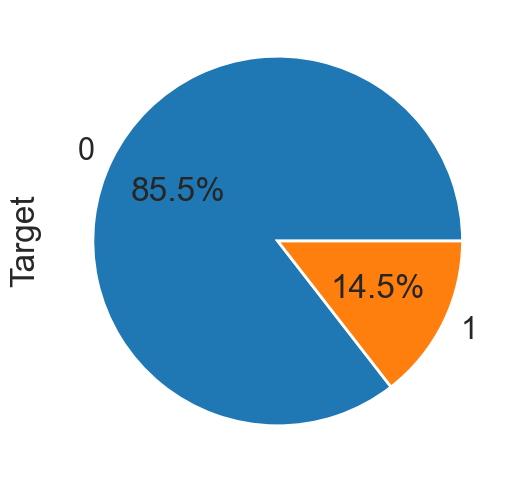

In [20]:
# ваш код здесь
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df.groupby('Churn').size().plot(kind='pie',
                                       y = "target",
                                       label = "Target",
                                       autopct='%1.1f%%')

In [21]:
from sklearn.model_selection import train_test_split

# ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [22]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [23]:
# ваш код здесь
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score

lg = LogisticRegression()
lg.fit(X_train_scaled, y_train)
y_train_pred_lg = lg.predict(X_train_scaled)
y_test_pred_lg = lg.predict(X_test_scaled)
print(f'f1 score train: {f1_score(y_train, y_train_pred_lg)}')
print(f'f1 score test: {f1_score(y_test, y_test_pred_lg)}')

f1 score train: 0.2987012987012987
f1 score test: 0.3163265306122449


In [28]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_train_pred_svc = svc.predict(X_train_scaled)
y_test_pred_svc = svc.predict(X_test_scaled)
print(f'f1 score train: {f1_score(y_train, y_train_pred_svc)}')
print(f'f1 score test: {f1_score(y_test, y_test_pred_svc)}')

f1 score train: 0.8069565217391305
f1 score test: 0.5740740740740741


In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_train_pred_dt = dt.predict(X_train_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)
print(f'f1 score train: {f1_score(y_train, y_train_pred_dt)}')
print(f'f1 score test: {f1_score(y_test, y_test_pred_dt)}')

f1 score train: 1.0
f1 score test: 0.6925795053003534


In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
y_train_pred_rfc = rfc.predict(X_train_scaled)
y_test_pred_rfc = rfc.predict(X_test_scaled)
print(f'f1 score train: {f1_score(y_train, y_train_pred_rfc)}')
print(f'f1 score test: {f1_score(y_test, y_test_pred_rfc)}')

f1 score train: 1.0
f1 score test: 0.8046875


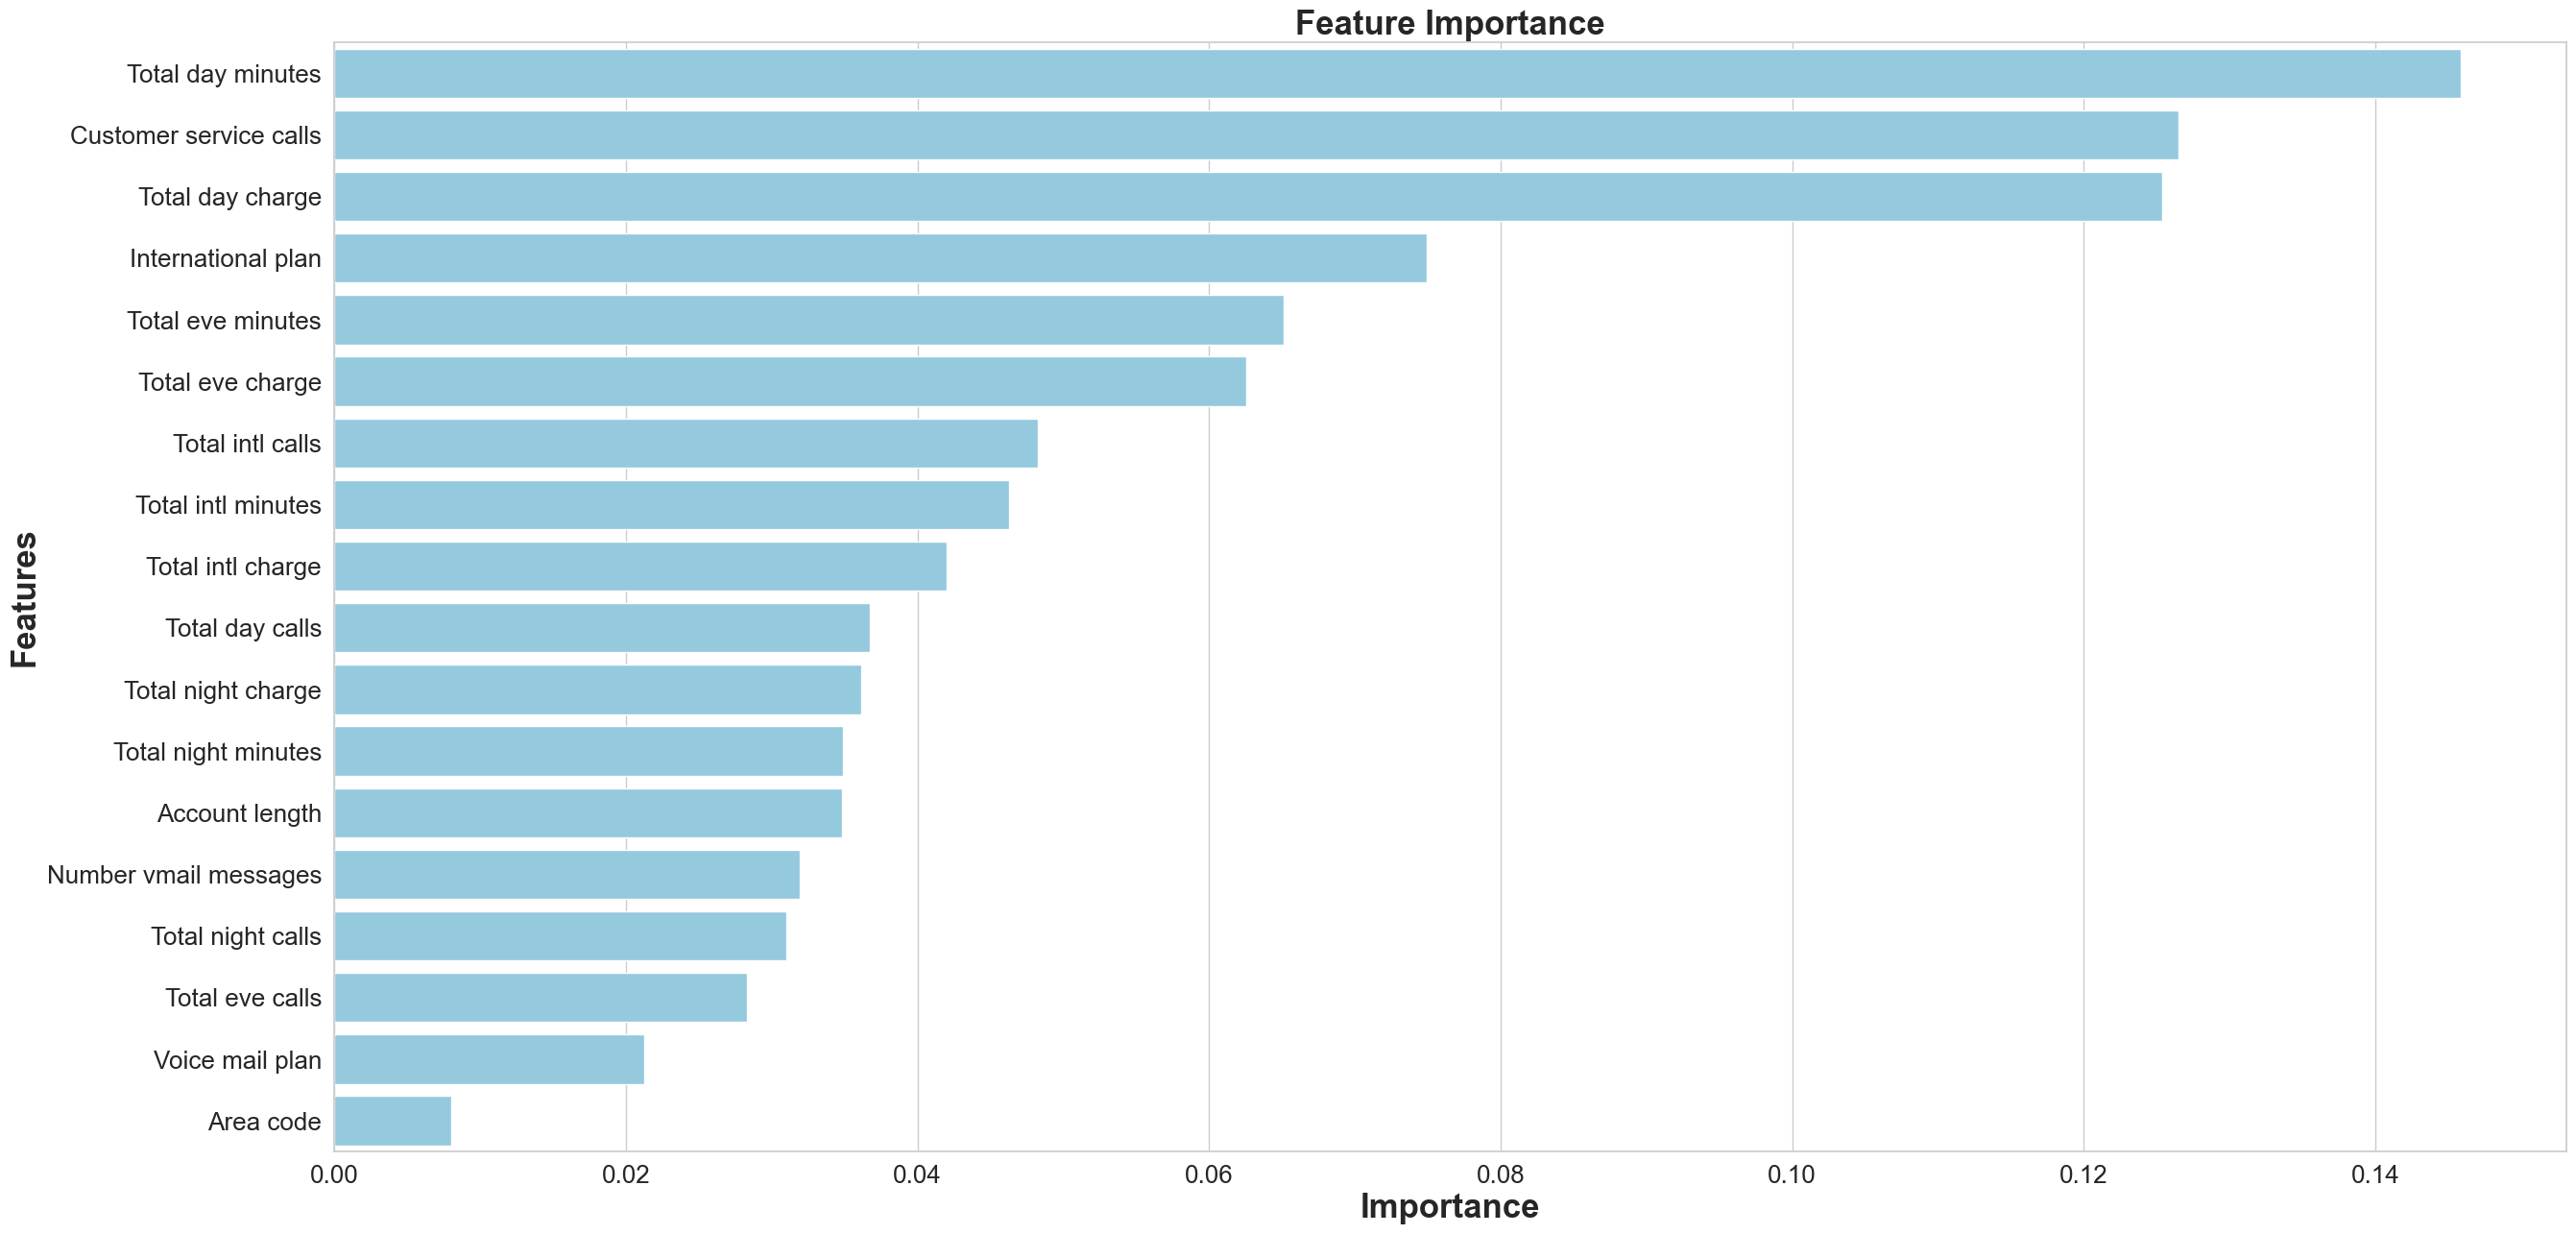

None

,Features,Gini-Importance
0,Total day minutes,0.145831
1,Customer service calls,0.126496
2,Total day charge,0.125359
3,International plan,0.074931
4,Total eve minutes,0.065110
5,Total eve charge,0.062544
6,Total intl calls,0.048236
7,Total intl minutes,0.046271
8,Total intl charge,0.042007
9,Total day calls,0.036721


In [29]:
feats = {}
for feature, importance in zip(X.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('RFC', RandomForestClassifier())])
pipe.fit(X, y)

max_depth = np.arange(1, 20, 2)
min_samples_split = np.arange(2, 10, 2)
min_samples_leaf = np.arange(1, 10, 2)

param_grid = {
    "RFC__max_depth": max_depth,
    "RFC__min_samples_split": min_samples_split,
    "RFC__min_samples_leaf": min_samples_leaf
}

### Передадим в GridSearchCV

search = GridSearchCV(pipe, param_grid, 
                      scoring='f1_macro', cv=5,)

search.fit(X, y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

C:\Users\Dell 5531\PycharmProjects\GB_Python_for_DS\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameter (CV score=0.90354):
{'RFC__max_depth': np.int64(19), 'RFC__min_samples_leaf': np.int64(1), 'RFC__min_samples_split': np.int64(6)}


In [33]:
from sklearn.model_selection import cross_val_score

pipe.set_params(RFC__max_depth=search.best_params_['RFC__max_depth'], 
                RFC__min_samples_split=search.best_params_['RFC__min_samples_split'],
                RFC__min_samples_leaf=search.best_params_['RFC__min_samples_leaf'])

cv_result_pipe = cross_val_score(pipe, X, y, 
                                scoring='f1_macro', cv=5)

print(f"Среднее f1: {np.mean(cv_result_pipe).round(3)}")

Среднее f1: 0.902


Были построены несколько моделей классификации на данных по оттоку клиентов телекома:
- логистическая регрессии LogisticRegression, модель не переобучилась, но качество модели низкая:
    - f1 score train: 0.3;
    - f1 score test: 0.316;
- метод опорных векторов SVC, качество модели улучшилось, но модель достаточно сильно переобучилась:
    - f1 score train: 0.807;
    - f1 score test: 0.574;
- дерево решений DecisionTreeClassifier, качество модели еще улучшилось по сравнению с моделью логистическо  регрессии и моделью опорных векторов, но модель опять достаточно сильно переобучилась:
    - f1 score train: 1.0;
    - f1 score test: 0.693;
- случайный лес, модель случайного леса не подходит для решения данной задачи, все показатели качества модели равны 0:
    - f1 score train: 1.0;
    - f1 score test: 0.805.

Самое лучшее качество было получено с помощью модели случайный лес. 
На модели случайный лес был запущен GridSearchCV для поиска оптимальных гиперпараметров модели опорных векторов. По результатов работы метода, были найдены следующие значения гиперпараметров:
был достигнуто качество модели f1 = 0.902
были найдены лучшие параметры модели случайный лес:
- максимальная глубина дерева = 19;
- минимальное число объектов в листе = 1;
- минимальное число объектов для разделения узла = 6.

Самыми важными признаками для определения оттока клиентов являются:
- Total day minutes;
- Customer service calls;
- Total day charge.
